## By: `Hrugved Kolhe`

# **Olympic Medal Prediction**

## Importing Libraries


In [1]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
#Setting up the fot the dataset
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [3]:
%cd dataset2/

/content/drive/My Drive/Colab Notebooks/dataset2


In [4]:
!ls

athlete_events.csv  hk.csv  sample_submission.csv  test.csv  train.csv


In [5]:
# Importing all the required packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Reading Dataset

In [6]:
# Reading the data
data = pd.read_csv('athlete_events.csv')

In [7]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,570,Pedro Abreu Pascal,M,23.0,200.0,88.0,Cuba,CUB,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,NaN
1019,571,Rubn Abreu Rivero,M,24.0,177.0,71.0,Venezuela,VEN,1996 Summer,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",NaN
1020,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,NaN
1021,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1023 non-null   int64  
 1   Name    1023 non-null   object 
 2   Sex     1023 non-null   object 
 3   Age     959 non-null    float64
 4   Height  773 non-null    float64
 5   Weight  776 non-null    float64
 6   Team    1023 non-null   object 
 7   NOC     1023 non-null   object 
 8   Games   1023 non-null   object 
 9   Year    1023 non-null   int64  
 10  Season  1023 non-null   object 
 11  City    1023 non-null   object 
 12  Sport   1023 non-null   object 
 13  Event   1023 non-null   object 
 14  Medal   112 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 120.0+ KB


In [9]:
# seeing group summary of season cloumn
data['Season'].value_counts()

Summer    874
Winter    149
Name: Season, dtype: int64

In [10]:
# seeing group summary of Medal cloumn
data['Medal'].value_counts()

Gold      45
Bronze    34
Silver    33
Name: Medal, dtype: int64

In [11]:
# seeing group summary of Event cloumn
data['Event'].value_counts()

Football Men's Football                        51
Hockey Men's Hockey                            26
Handball Men's Handball                        20
Volleyball Men's Volleyball                    19
Water Polo Men's Water Polo                    18
                                               ..
Canoeing Men's Canadian Doubles, 500 metres     1
Speed Skating Women's Team Pursuit (6 laps)     1
Rowing Women's Coxed Eights                     1
Athletics Women's 1,500 metres                  1
Rowing Women's Single Sculls                    1
Name: Event, Length: 272, dtype: int64

In [12]:
# seeing group summary of Team cloumn
data['Team'].value_counts()

Egypt            189
Norway            59
United States     41
Finland           34
Japan             27
                ... 
Russia-2           1
Niger              1
Uruguay            1
Kenya              1
Thessalonki-1      1
Name: Team, Length: 115, dtype: int64

## Exploratory Data Analysis

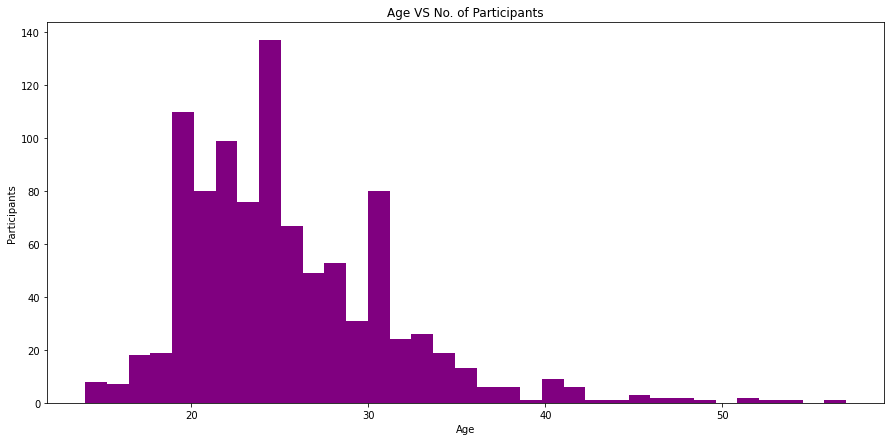

In [13]:
# Age Distribution

plt.figure(figsize=(15,7))
plt.title("Age VS No. of Participants")
plt.hist(data.Age,color='purple', bins = 35)
plt.xlabel("Age")
plt.ylabel("Participants")
plt.show()

In [14]:
# Age to participant distribution
age_dist = data.Age.value_counts().sort_values(ascending=False).head(15)
age_dist

22.0    99
21.0    80
23.0    76
24.0    75
19.0    68
26.0    67
25.0    62
28.0    53
27.0    49
30.0    45
20.0    42
31.0    35
29.0    31
33.0    26
32.0    24
Name: Age, dtype: int64

Most of the athletes are in between Age group 20 to 30


In [15]:
# Gender Distribution
gender_unique_values = data.Sex.value_counts()
gender_unique_values

M    857
F    166
Name: Sex, dtype: int64

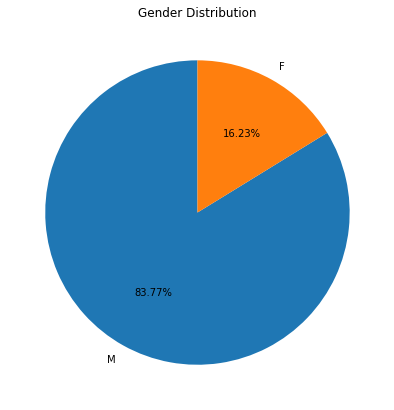

In [16]:
plt.figure(figsize=(15,7))
plt.title("Gender Distribution")
plt.pie(gender_unique_values, labels=gender_unique_values.index, autopct="%.2f%%", startangle=90)
plt.show()

Here, We observe that male participants are more than female participants in the olympics

In [17]:
# seeing female participants in each year in summer season

female_part = data[(data.Sex=='F') & (data.Season == 'Summer')][['Sex', 'Year']]
female_part = female_part.groupby('Year').count().reset_index()
female_part

,Year,Sex
0,1900,2
1,1932,2
2,1948,1
3,1956,2
4,1960,5
5,1964,1
6,1972,6
7,1976,1
8,1980,3
9,1984,7


Text(0, 0.5, 'Female Participants')

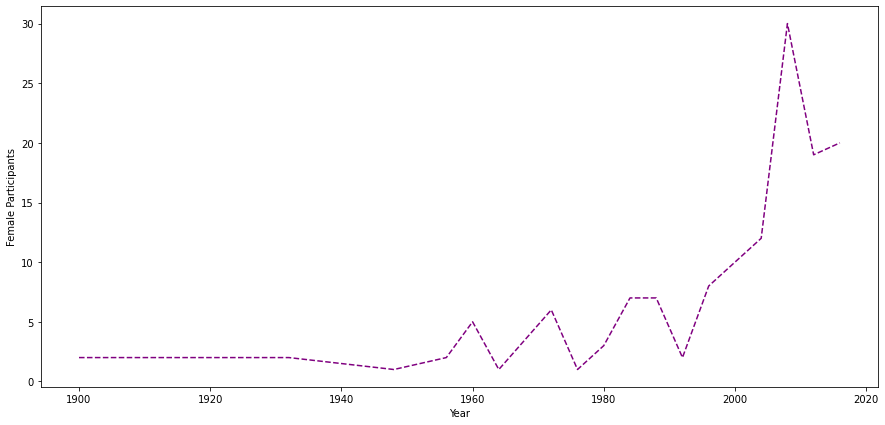

In [18]:
# Visualizing the female participant data

plt.figure(figsize=(15,7))
sns.lineplot(data=female_part, x='Year', y='Sex', linestyle = '--', color = 'purple')
plt.xlabel('Year')
plt.ylabel('Female Participants')

We can see that Female Participants have increased by a great extent since 1960's

In [19]:
# Participants across the season

seasons = data.Season.value_counts()
seasons

Summer    874
Winter    149
Name: Season, dtype: int64

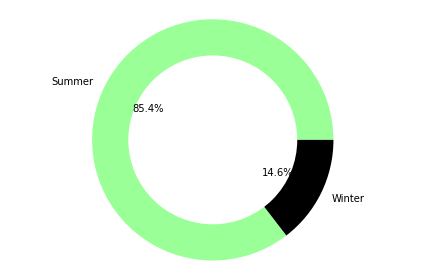

In [20]:
# Visualizing paritipant distribution in different season
fig1, ax1 = plt.subplots()

colors = ['#99ff96','#000000']

ax1.pie(seasons, colors = colors, labels=seasons.index, autopct='%1.1f%%')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

Participation in summer season is more than the winter season

In [21]:
# Top 15 Countries participating in Olympics by no. of participants
top_countries = data.Team.value_counts().sort_values(ascending=False).head(15)
top_countries

Egypt                   189
Norway                   59
United States            41
Finland                  34
Japan                    27
Spain                    27
Iraq                     25
Russia                   24
Italy                    21
United Arab Republic     21
Netherlands              19
Sweden                   19
Portugal                 18
Canada                   17
Great Britain            17
Name: Team, dtype: int64

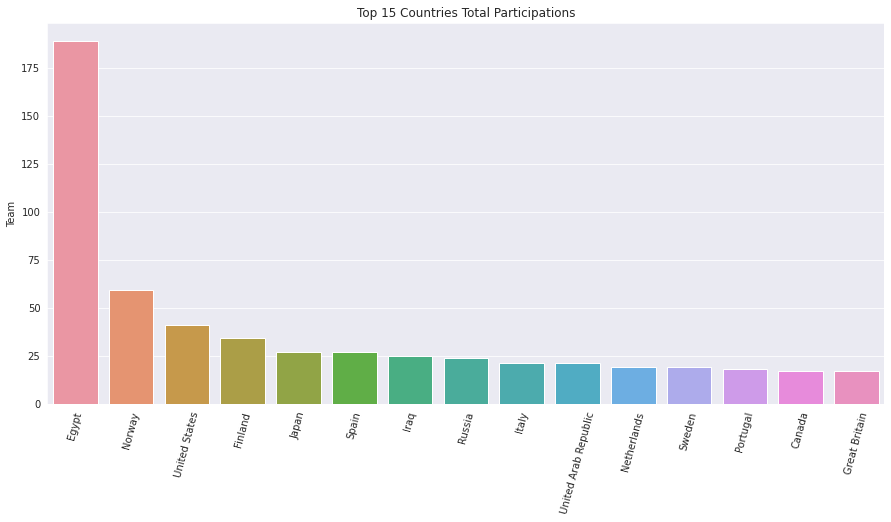

In [22]:
# Data Visualization of countries participating
sns.set_style('darkgrid')
plt.figure(figsize=(15, 7))
plt.title('Top 15 Countries Total Participations')
plt.xticks(rotation=75)
sns.barplot(x=top_countries.index, y=top_countries)

In [23]:
# Data of countries with most Gold medals

max_year_country = data[(data.Medal == 'Gold')].Team
max_year_country = max_year_country.value_counts().head(20)
max_year_country


Italy               7
Norway              7
France              4
United States       4
Spain               3
Finland             3
Vesper Boat Club    2
Bulgaria            1
Uzbekistan          1
Pakistan            1
Cameroon            1
Canada              1
Belarus             1
Azerbaijan          1
Hungary             1
Soviet Union        1
Taifun              1
Japan               1
Great Britain       1
Unified Team        1
Name: Team, dtype: int64

Text(0.5, 0, 'Top 20 Gold Medal Won Countrywise')

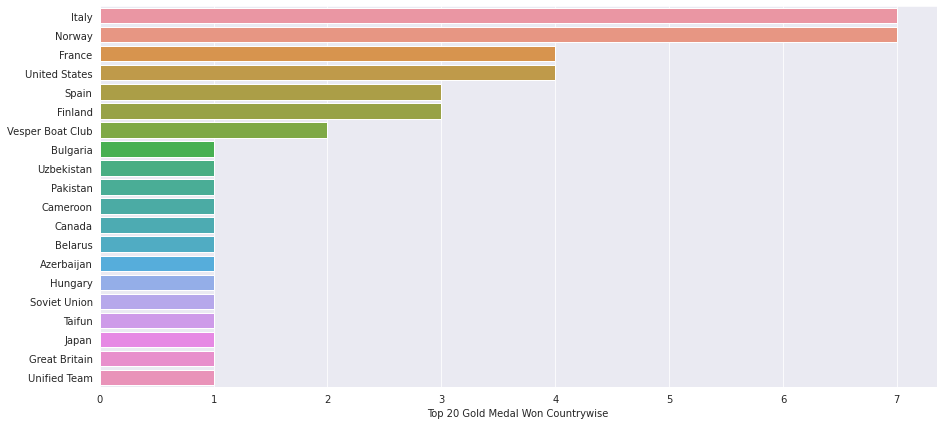

In [24]:
# Visulaizing the countries with most Gold medals
plt.figure(figsize=(15,7))
sns.barplot(x=max_year_country, y=max_year_country.index)
plt.xlabel("Top 20 Gold Medal Won Countrywise")

Text(0, 0.5, 'Height')

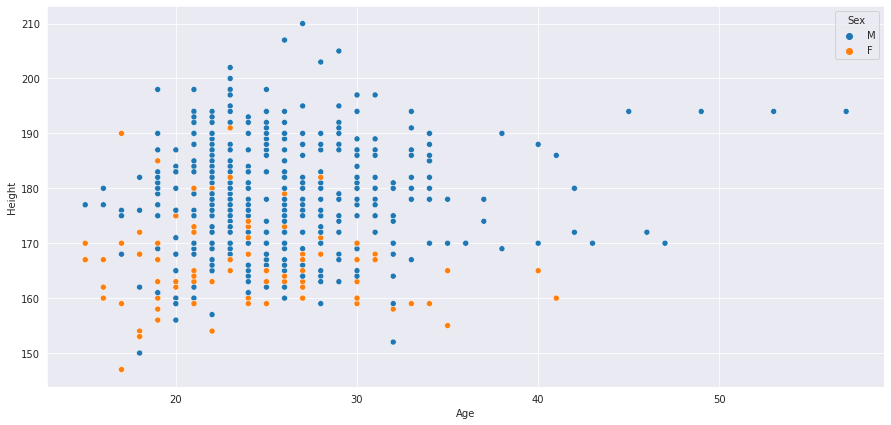

In [25]:
# Age vs Height Spread

age_heig = data[(data.Age != 0) & (data.Height != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_heig.Age, y=age_heig.Height, data=age_heig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Height')

Text(0, 0.5, 'Weight')

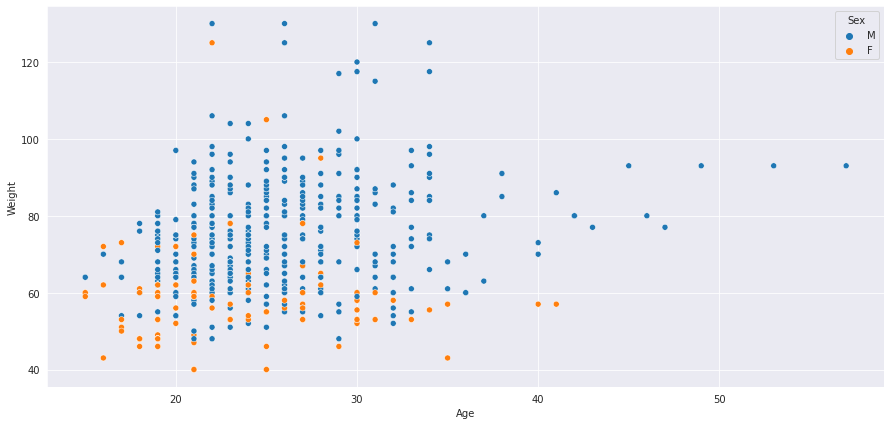

In [26]:
# Age vs Weight Spread

age_weig = data[(data.Age != 0.0) & (data.Weight != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=age_weig.Age, y=age_weig.Weight, data=age_weig, hue='Sex')
plt.xlabel('Age')
plt.ylabel('Weight')


Text(0, 0.5, 'Height')

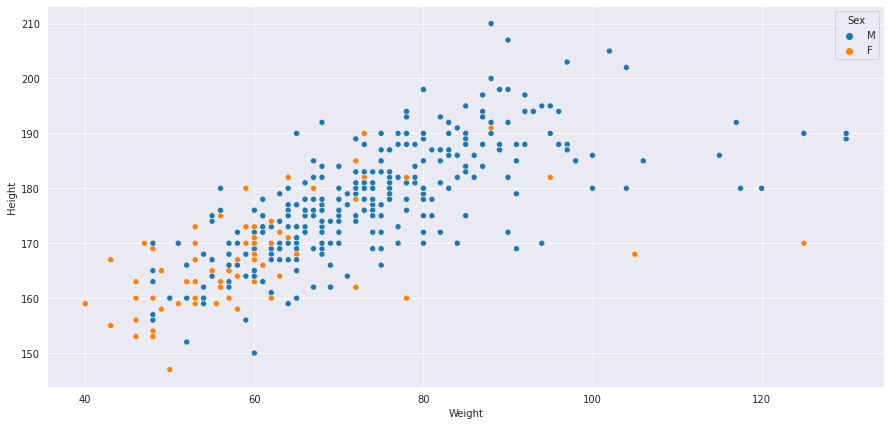

In [27]:
# Weight & Height Spread

heig_weight = data[(data.Height != 0.0) & (data.Age != 0) & (data.Weight != 0.0) & (data.Medal != 'None') & (data.Season == 'Summer')]
plt.figure(figsize=(15,7))
sns.scatterplot(x=heig_weight.Weight, y=heig_weight.Height, data=heig_weight, hue='Sex')
plt.xlabel('Weight')
plt.ylabel('Height')

## Data Cleaning

In [28]:
# To fill missing values in Medal column with 0's and 1's
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)


In [29]:
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,570,Pedro Abreu Pascal,M,23.0,200.0,88.0,Cuba,CUB,1980 Summer,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,0
1019,571,Rubn Abreu Rivero,M,24.0,177.0,71.0,Venezuela,VEN,1996 Summer,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",0
1020,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,0
1021,572,Rui Pinto de Abreu,M,15.0,177.0,64.0,Portugal,POR,1976 Summer,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,0


In [30]:
# Drop Uncessary feature columns
data = data.drop(['ID', 'Name', 'Games'], axis=1)

In [31]:
# Checking null values in the data 
data.isna().mean()


Sex       0.000000
Age       0.062561
Height    0.244379
Weight    0.241447
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [32]:
data.groupby(['Medal', 'Sex']).mean().astype(np.int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     166      60  1997
      M     25     177      73  1980
1     F     21     169      60  1989
      M     25     179      79  1974

In [33]:
# Fill null values with mean values for these columns
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])[column].apply(lambda x: x.fillna(x.mean()).astype(np.int))

In [34]:
# Checking null values again
print("Total missing values:", data.isna().sum().sum())


Total missing values: 0


In [35]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,24,180,80,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,23,170,60,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,24,177,73,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,34,179,79,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,21,185,82,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1018,M,23,200,88,Cuba,CUB,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,0
1019,M,24,177,71,Venezuela,VEN,1996,Summer,Atlanta,Cycling,"Cycling Men's Road Race, Individual",0
1020,M,15,177,64,Portugal,POR,1976,Summer,Montreal,Swimming,Swimming Men's 400 metres Freestyle,0
1021,M,15,177,64,Portugal,POR,1976,Summer,Montreal,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,0


In [36]:
# Checking no. of unique values in the column
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'City': 41,
 'Event': 272,
 'NOC': 106,
 'Season': 2,
 'Sex': 2,
 'Sport': 47,
 'Team': 115}

In [37]:
# defining the function.
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [38]:
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values=['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [39]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_Afghanistan,T_Algeria,T_Angola,T_Argentina,T_Armenia,T_Australia,T_Azerbaijan,T_Bahrain,T_Belarus,T_Belgium,T_Benin,T_Brazil,T_Brunei,T_Bulgaria,T_Cameroon,T_Canada,T_Chad,T_Chile,T_China,T_Comoros,T_Congo (Brazzaville),T_Costa Rica,T_Cote d'Ivoire,T_Croatia,T_Cuba,T_Denmark,T_Denmark/Sweden,T_Djibouti,T_East Germany,T_Egypt,T_Eritrea,T_Estonia,T_Ethiopia,...,E_Taekwondo Women's Featherweight,E_Taekwondo Women's Flyweight,E_Taekwondo Women's Heavyweight,E_Tennis Men's Doubles,E_Tennis Men's Singles,E_Trampolining Men's Individual,E_Tug-Of-War Men's Tug-Of-War,E_Volleyball Men's Volleyball,E_Volleyball Women's Volleyball,E_Water Polo Men's Water Polo,E_Water Polo Women's Water Polo,E_Weightlifting Men's Featherweight,E_Weightlifting Men's Flyweight,E_Weightlifting Men's Heavyweight,E_Weightlifting Men's Light-Heavyweight,E_Weightlifting Men's Lightweight,E_Weightlifting Men's Middle-Heavyweight,E_Weightlifting Men's Middleweight,E_Weightlifting Women's Featherweight,E_Weightlifting Women's Heavyweight,E_Weightlifting Women's Light-Heavyweight,E_Weightlifting Women's Lightweight,E_Weightlifting Women's Super-Heavyweight,"E_Wrestling Men's Bantamweight, Freestyle","E_Wrestling Men's Bantamweight, Greco-Roman","E_Wrestling Men's Featherweight, Freestyle","E_Wrestling Men's Flyweight, Freestyle","E_Wrestling Men's Flyweight, Greco-Roman","E_Wrestling Men's Heavyweight, Freestyle","E_Wrestling Men's Heavyweight, Greco-Roman","E_Wrestling Men's Light-Heavyweight, Freestyle","E_Wrestling Men's Light-Heavyweight, Greco-Roman","E_Wrestling Men's Lightweight, Freestyle","E_Wrestling Men's Lightweight, Greco-Roman","E_Wrestling Men's Middleweight A, Greco-Roman","E_Wrestling Men's Middleweight, Freestyle","E_Wrestling Men's Middleweight, Greco-Roman","E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman"
0,1,24,180,80,1992,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,23,170,60,2012,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,24,177,73,1920,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,34,179,79,1900,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,21,185,82,1988,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,1,23,200,88,1980,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1019,1,24,177,71,1996,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1020,1,15,177,64,1976,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1021,1,15,177,64,1976,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
# Spilt data in target column and features columns
y = data['Medal']
X = data.drop('Medal', axis=1)

## Feature Selection

In [41]:
#Apply SelectKBest and extract top 10 features out of the data
best = SelectKBest(score_func=chi2, k=10)

In [42]:
fit = best.fit(X,y)


In [43]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [44]:
# Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))


                                             Feature      Score
3                                             Weight  37.606077
56                                           T_Italy  36.976169
172                                            N_ITA  36.976169
476                       E_Rowing Men's Coxed Pairs  33.664149
49                                         T_Hungary  32.245193
164                                            N_HUN  32.245193
319                    E_Alpine Skiing Men's Super G  24.453160
449  E_Gymnastics Men's Team All-Around, Free System  24.401786
298                                         S_Rowing  22.201309
35                                           T_Egypt  21.044390
148                                            N_EGY  21.044390


In [45]:
# Select 10 features
features=scores["Feature"].tolist()[:10]
features

['Sex',
 'Age',
 'Height',
 'Weight',
 'Year',
 'Season',
 'T_Afghanistan',
 'T_Algeria',
 'T_Angola',
 'T_Argentina']

## Make new dataset with cleaned data

In [46]:
data=data[['Age','Sex','Height','Weight','Year','Season','T_Afghanistan','T_Algeria','T_Angola','T_Argentina','Medal']]
data.head()

,Age,Sex,Height,Weight,Year,Season,T_Afghanistan,T_Algeria,T_Angola,T_Argentina,Medal
0,24,1,180,80,1992,1,0,0,0,0,0
1,23,1,170,60,2012,1,0,0,0,0,0
2,24,1,177,73,1920,1,0,0,0,0,0
3,34,1,179,79,1900,1,0,0,0,0,1
4,21,0,185,82,1988,0,0,0,0,0,0


In [47]:
y = data['Medal']
X = data.drop(['Medal'], axis=1)

#Split data into training and testing data
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)


## Feature Scaling

In [48]:
# Scaling data 
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

## Predictive Modeling

In [53]:
# 1. Logistic Regression

algo1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_conf_matrix = confusion_matrix(test_y, lr_predict)
lr_acc_score = accuracy_score(test_y, lr_predict)
print("confusion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(test_y,lr_predict))

confusion matrix
[[359   0]
 [ 51   0]]


Accuracy of Logistic Regression: 87.5609756097561 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       359
           1       0.00      0.00      0.00        51

    accuracy                           0.88       410
   macro avg       0.44      0.50      0.47       410
weighted avg       0.77      0.88      0.82       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# 2. Multinomial Naive Bayes

algo2 = 'MultinomialNB'
nv = MultinomialNB()
nv.fit(train_x, train_y)
nv_predict = nv.predict(test_x)
nv_conf_matrix = confusion_matrix(test_y, nv_predict)
nv_acc_score = accuracy_score(test_y, nv_predict)
print("confusion matrix")
print(nv_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",nv_acc_score*100,'\n')
print(classification_report(test_y,nv_predict))

confusion matrix
[[359   0]
 [ 51   0]]


Accuracy of Logistic Regression: 87.5609756097561 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       359
           1       0.00      0.00      0.00        51

    accuracy                           0.88       410
   macro avg       0.44      0.50      0.47       410
weighted avg       0.77      0.88      0.82       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# 3. Decision Tree 

algo3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=10,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_acc_score = accuracy_score(test_y, dt_predicted)
print("confusion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(test_y,dt_predicted))

confusion matrix
[[340  19]
 [ 32  19]]


Accuracy of DecisionTreeClassifier: 87.5609756097561 

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       359
           1       0.50      0.37      0.43        51

    accuracy                           0.88       410
   macro avg       0.71      0.66      0.68       410
weighted avg       0.86      0.88      0.87       410



In [65]:
# 4. Random Forest 

algo4 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=200, random_state=10,max_depth=15)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_acc_score = accuracy_score(test_y, rf_predicted)
print("confusion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(test_y,rf_predicted))

confusion matrix
[[351   8]
 [ 37  14]]


Accuracy of Random Forest: 89.02439024390245 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       359
           1       0.64      0.27      0.38        51

    accuracy                           0.89       410
   macro avg       0.77      0.63      0.66       410
weighted avg       0.87      0.89      0.87       410



In [66]:
# 5. Gradient Boosting 

algo5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_conf_matrix = confusion_matrix(test_y, gvc_predicted)
gvc_acc_score = accuracy_score(test_y, gvc_predicted)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting Classifier:",gvc_acc_score*100,'\n')
print(classification_report(test_y,gvc_predicted))

confusion matrix
[[350   9]
 [ 38  13]]


Accuracy of Gradient Boosting Classifier: 88.53658536585365 

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       359
           1       0.59      0.25      0.36        51

    accuracy                           0.89       410
   macro avg       0.75      0.61      0.65       410
weighted avg       0.86      0.89      0.86       410



In [72]:
# 6. Neural Network

algo6 = 'Neural Network'
inputs = tf.keras.Input(shape=(X.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)


history = model.fit(
    train_x,
    train_y,
    validation_split=0.4,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
12/12 [==============================] - 1s 51ms/step - loss: 0.4850 - accuracy: 0.8828 - auc: 0.4982 - val_loss: 0.3566 - val_accuracy: 0.9268 - val_auc: 0.5436
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3844 - accuracy: 0.8828 - auc: 0.5017 - val_loss: 0.2783 - val_accuracy: 0.9268 - val_auc: 0.5599
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3655 - accuracy: 0.8828 - auc: 0.4943 - val_loss: 0.2677 - val_accuracy: 0.9268 - val_auc: 0.5652
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 0.3672 - accuracy: 0.8828 - auc: 0.4870 - val_loss: 0.2670 - val_accuracy: 0.9268 - val_auc: 0.5799
Epoch 5/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3636 - accuracy: 0.8828 - auc: 0.4929 - val_loss: 0.2710 - val_accuracy: 0.9268 - val_auc: 0.5916
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: 0.3619 - accuracy: 0.8828 - auc: 0.4964 - val_loss: 0.2729 - 

In [73]:
model.evaluate(test_x, test_y)

13/13 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.8756 - auc: 0.5041


[0.3830440938472748, 0.8756097555160522, 0.5040963888168335]

In [74]:
y_true = np.array(test_y)
y_pred = np.squeeze(np.array(model.predict(test_x) >= 0.5, dtype=np.int))

In [75]:
nn_conf_matrix = confusion_matrix(y_true, y_pred)
nn_acc_score = accuracy_score(y_true, y_pred)
print("confusion matrix")
print(gvc_conf_matrix)
print("\n")
print("Accuracy of Neural Network:",nn_acc_score*100,'\n')
print(classification_report(y_true, y_pred))

confusion matrix
[[350   9]
 [ 38  13]]


Accuracy of Neural Network: 87.5609756097561 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       359
           1       0.00      0.00      0.00        51

    accuracy                           0.88       410
   macro avg       0.44      0.50      0.47       410
weighted avg       0.77      0.88      0.82       410



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Model Evaluation

In [76]:
#Evaluating all the Algorithms at once.

model_ev = pd.DataFrame({'Model': ['Logistic Regression','MultinomialNB','Decision Tree','Random Forest',
                                  'Gradient Boosting','Neural Network'], 
                         'Accuracy': [lr_acc_score*100, nv_acc_score*100, dt_acc_score*100, rf_acc_score*100,gvc_acc_score*100,
                                      nn_acc_score*100]})
model_ev

,Model,Accuracy
0,Logistic Regression,87.560976
1,MultinomialNB,87.560976
2,Decision Tree,87.560976
3,Random Forest,89.024390
4,Gradient Boosting,88.536585
5,Neural Network,87.560976


## Final Random Forest Classifier Model


In [77]:
# Deciding the algorithm to use

model = RandomForestClassifier(n_estimators=200, random_state=0,max_depth=12)
model.fit(train_x,train_y)
predicted = model.predict(test_x)
accuracy = accuracy_score(test_y, rf_predicted)
print("Accuracy of Random Forest:",accuracy*100,'\n')


Accuracy of Random Forest: 89.02439024390245 



## Conclusion
Therefore, Random Forest Classifier Model performs best among all models on the given dataset.